
1. [sdfgf](https://catalog.data.gov/dataset/vsrr-state-and-national-provisional-counts-for-live-births-deaths-and-infant-deaths) VSRR - State and National Provisional Counts for Live Births, Deaths, and Infant Deaths
2. https://data.cdc.gov/api/views/hc4f-j6nb/rows.csv - 93 rows 14 columns
3. https://www.mdch.state.mi.us/osr/Provisional/MonthlyDeaths.csv

https://covidtracking.com/data/api

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv( "https://api.covidtracking.com/v1/states/daily.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18418 entries, 0 to 18417
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         18418 non-null  int64  
 1   state                        18418 non-null  object 
 2   positive                     18232 non-null  float64
 3   probableCases                7890 non-null   float64
 4   negative                     17971 non-null  float64
 5   pending                      1929 non-null   float64
 6   totalTestResultsSource       18418 non-null  object 
 7   totalTestResults             18316 non-null  float64
 8   hospitalizedCurrently        15112 non-null  float64
 9   hospitalizedCumulative       11295 non-null  float64
 10  inIcuCurrently               9770 non-null   float64
 11  inIcuCumulative              3288 non-null   float64
 12  onVentilatorCurrently        7778 non-null   float64
 13  onVentilatorCumu

In [7]:
len( data )

18418

In [8]:
data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210124,AK,51610.0,NaN,1401860.0,NaN,totalTestsViral,1453470.0,57.0,1185.0,...,1453470,0,1,657bf064457b28ae60abcd8b2ac6ccf4b4c11643,0,0,0,0,0,NaN
1,20210124,AL,441170.0,91709.0,1737094.0,NaN,totalTestsPeopleViral,2086555.0,2254.0,40514.0,...,2178264,3,0,a5886e16177a22e9e711e0d36eafcaecba90307d,0,0,0,0,0,NaN
2,20210124,AR,284066.0,56238.0,2119560.0,NaN,totalTestsViral,2347388.0,1080.0,13267.0,...,2403626,43,17,dcd628b60b2155bbe3365ea432671d94b2e69596,0,0,0,0,0,NaN
3,20210124,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,3c81ee980bf91ef3fe383f82e1094d0d8fc76e2c,0,0,0,0,0,NaN
4,20210124,AZ,722574.0,44099.0,2671771.0,NaN,totalTestsViral,6385219.0,4320.0,50264.0,...,3394345,68,301,2453c8080bd6d93c891880b4084cd6e120bbad71,0,0,0,0,0,NaN


In [9]:
provis_data = pd.read_csv( "https://data.cdc.gov/api/views/hmz2-vwda/rows.csv" )

In [10]:
provis_data

,State,Year,Month,Period,Indicator,Data Value
0,UNITED STATES,2019,January,Monthly,Number of Live Births,311000
1,UNITED STATES,2019,February,Monthly,Number of Live Births,280000
2,UNITED STATES,2019,March,Monthly,Number of Live Births,304000
3,UNITED STATES,2019,April,Monthly,Number of Live Births,299000
4,UNITED STATES,2019,May,Monthly,Number of Live Births,316000
...,...,...,...,...,...,...
1975,WASHINGTON,2020,June,Monthly,Number of Live Births,7117
1976,WEST VIRGINIA,2020,June,Monthly,Number of Live Births,1449
1977,WISCONSIN,2020,June,Monthly,Number of Live Births,5249
1978,WYOMING,2020,June,Monthly,Number of Live Births,526


In [28]:
provis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       1980 non-null   object
 1   Year        1980 non-null   int64 
 2   Month       1980 non-null   object
 3   Period      1980 non-null   object
 4   Indicator   1980 non-null   object
 5   Data Value  1980 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 92.9+ KB


In [27]:
provis_data.describe()

,Year,Data Value
count,1980.000000,1.980000e+03
mean,2019.333333,7.049803e+04
std,0.471524,4.463652e+05
min,2019.000000,3.370000e+02
25%,2019.000000,1.554750e+03
50%,2019.000000,4.042000e+03
75%,2020.000000,7.114750e+03
max,2020.000000,3.786000e+06


In [11]:
provis_data["State"]

0       UNITED STATES
1       UNITED STATES
2       UNITED STATES
3       UNITED STATES
4       UNITED STATES
            ...      
1975       WASHINGTON
1976    WEST VIRGINIA
1977        WISCONSIN
1978          WYOMING
1979      PUERTO RICO
Name: State, Length: 1980, dtype: object

In [12]:
from datetime import datetime

* [strptime format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [29]:
provis_data['Date'] = provis_data[ 'Year' ].astype( str ) + " " + provis_data[ 'Month' ]

In [30]:
provis_data['Date']

0        2019 January
1       2019 February
2          2019 March
3          2019 April
4            2019 May
            ...      
1975        2020 June
1976        2020 June
1977        2020 June
1978        2020 June
1979        2020 June
Name: Date, Length: 1980, dtype: object

In [32]:
provis_data['Date'] = pd.to_datetime( provis_data['Date'], format="%Y %B" )

In [35]:
provis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       1980 non-null   object        
 1   Year        1980 non-null   int64         
 2   Month       1980 non-null   object        
 3   Period      1980 non-null   object        
 4   Indicator   1980 non-null   object        
 5   Data Value  1980 non-null   int64         
 6   Date        1980 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 108.4+ KB


# Using dt Accessor 

In [51]:
provis_data['Date'].dt

In [38]:
maryland_data = provis_data[ provis_data[ 'State' ] == 'MARYLAND' ]

In [39]:
maryland_deaths = maryland_data[ maryland_data[ 'Indicator' ] == 'Number of Deaths' ]

In [40]:
maryland_deaths

,State,Year,Month,Period,Indicator,Data Value,Date
128,MARYLAND,2019,January,Monthly,Number of Deaths,4573,2019-01-01
180,MARYLAND,2019,February,Monthly,Number of Deaths,4068,2019-02-01
232,MARYLAND,2019,March,Monthly,Number of Deaths,4636,2019-03-01
284,MARYLAND,2019,April,Monthly,Number of Deaths,4241,2019-04-01
336,MARYLAND,2019,May,Monthly,Number of Deaths,4138,2019-05-01
388,MARYLAND,2019,June,Monthly,Number of Deaths,3992,2019-06-01
440,MARYLAND,2019,July,Monthly,Number of Deaths,4047,2019-07-01
492,MARYLAND,2019,August,Monthly,Number of Deaths,4040,2019-08-01
544,MARYLAND,2019,September,Monthly,Number of Deaths,3878,2019-09-01
596,MARYLAND,2019,October,Monthly,Number of Deaths,4274,2019-10-01


<AxesSubplot:xlabel='Date'>

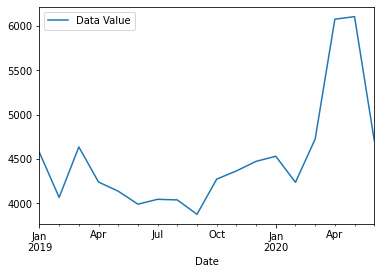

In [41]:
maryland_deaths.plot( x='Date', y="Data Value" )

In [54]:
import seaborn as sns

<AxesSubplot:xlabel='Month', ylabel='Data Value'>

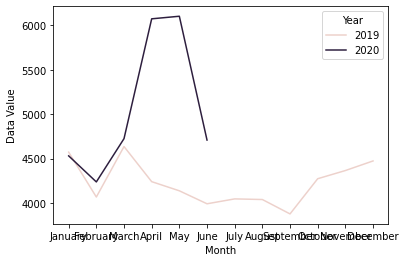

In [55]:
sns.lineplot( x='Month', y='Data Value', hue='Year', data=maryland_deaths)

<AxesSubplot:xlabel='Date'>

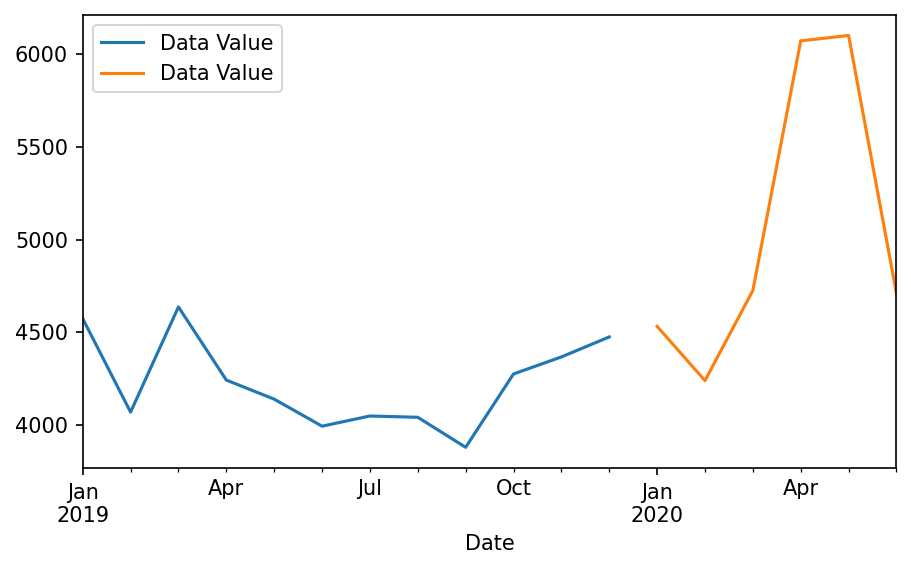

In [50]:
fig, ax = plt.subplots( figsize=(7,4), dpi=150 )
maryland_deaths_2019.plot( x='Date', y="Data Value", ax=ax)
maryland_deaths_2020.plot( x='Date', y="Data Value", ax=ax)

In [7]:
provis_data['State'].value_counts().sort_index()

ALABAMA                  36
ALASKA                   36
ARIZONA                  36
ARKANSAS                 36
CALIFORNIA               36
COLORADO                 36
CONNECTICUT              36
DELAWARE                 36
DISTRICT OF COLUMBIA     36
FLORIDA                  36
GEORGIA                  36
HAWAII                   36
IDAHO                    36
ILLINOIS                 36
INDIANA                  36
IOWA                     36
KANSAS                   36
KENTUCKY                 36
LOUISIANA                36
MAINE                    36
MARYLAND                 36
MASSACHUSETTS            36
MICHIGAN                 36
MINNESOTA                36
MISSISSIPPI              36
MISSOURI                 36
MONTANA                  36
NEBRASKA                 36
NEVADA                   36
NEW HAMPSHIRE            36
NEW JERSEY               36
NEW MEXICO               36
NEW YORK                 36
NORTH CAROLINA           36
NORTH DAKOTA             36
OHIO                

In [5]:
provis_data['Period'].value_counts()

Monthly            1926
12 Month-ending      54
Name: Period, dtype: int64

In [6]:
provis_data['Indicator'].value_counts()

Number of Live Births      972
Number of Deaths           972
Number of Infant Deaths     36
Name: Indicator, dtype: int64

In [ ]:
len( provis_data['State'].unique() )